In [84]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [85]:
import numpy as np
import pandas as pd

In [86]:
import datetime as dt

In [87]:
 # Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [88]:
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [89]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)

In [90]:
 # We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [91]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [92]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [93]:
#Show first row in dictionary format
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x29f3ad45f48>,
 'date': '2010-01-01',
 'tobs': 65.0,
 'id': 1,
 'prcp': 0.08,
 'station': 'USC00519397'}

In [94]:
#Show first row in dictionary format
first_row = session.query(Station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x29f3ad4a988>,
 'station': 'USC00519397',
 'name': 'WAIKIKI 717.2, HI US',
 'longitude': -157.8168,
 'latitude': 21.2716,
 'id': 1,
 'elevation': 3.0}

In [95]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [96]:
 # Design a query to retrieve the last 12 months of precipitation data and plot the results
session.query(func.count(Measurement.date)).all()

[(19550)]

In [97]:
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [98]:
# Calculate the date 1 year ago from the last data point in the database
one_year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)

print("One year ago:", one_year_ago)

One year ago: 2016-08-23


In [99]:
# Perform a query to retrieve the data and precipitation scores
prcp_recent_year = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > one_year_ago).all()
prcp_recent_year

[('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06', 0.0),
 ('2016-10-07'

In [100]:
# Save the query results as a Pandas DataFrame
prcp_recent_year_df = pd.DataFrame(prcp_recent_year)
prcp_recent_year_df

,date,prcp
0,2016-08-24,0.08
1,2016-08-25,0.08
2,2016-08-26,0.00
3,2016-08-27,0.00
4,2016-08-28,0.01
...,...,...
2218,2017-08-19,0.09
2219,2017-08-20,NaN
2220,2017-08-21,0.56
2221,2017-08-22,0.50


In [101]:
#set the index to the date column
prcp_recent_year_df.set_index("date")

,prcp
date,
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01
...,...
2017-08-19,0.09
2017-08-20,NaN
2017-08-21,0.56


In [102]:
# Sort the dataframe by date
#prcp_recent_year_df = prcp_recent_year_df.sort_values(by="date")

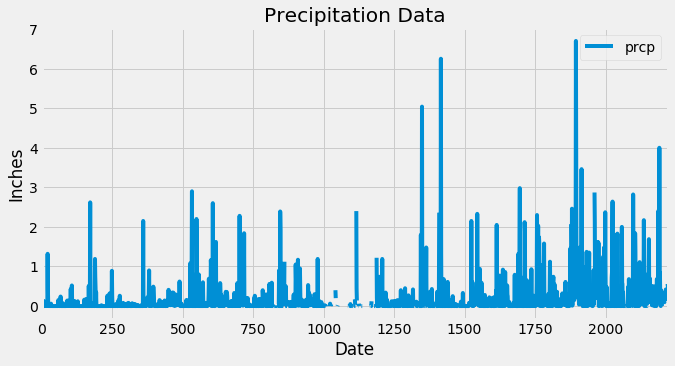

In [103]:
# Use Pandas Plotting with Matplotlib to plot the data
ax = prcp_recent_year_df.plot(figsize=(10,5))
ax.set_xlabel("Date") 
ax.set_ylabel("Inches")
ax.set_title("Precipitation Data")
plt.show()

In [104]:
 # Use Pandas to calcualte the summary statistics for the precipitation data
prcp_recent_year_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [105]:
# Design a query to show how many stations are available in this axdataset?
session.query(Station.id).count()

9

In [106]:
# What are the most active stations? (i.e. what stations have the most rows)?
#List the stations and observation counts in descending order
active_locations = session.query(Measurement.station, func.count(Measurement.station))\
    .group_by(Measurement.station)\
    .order_by(func.count(Measurement.station).desc()).all()
active_locations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [107]:
#Which station has the highest number of observations?
most_observations = "USC00519281"

In [108]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
lowest_temp = session.query(func.min(Measurement.tobs)).\
    filter(Measurement.station==most_observations).all()
lowest_temp

[(54.0)]

In [115]:
# highest temperature recorded, and average temperature of the most active station?
highest_temp = session.query(func.max(Measurement.tobs)).\
    filter(Measurement.station==most_observations).all()
highest_temp

[(85.0)]

In [110]:
average_temp = session.query(func.avg(Measurement.tobs)).\
    filter(Measurement.station==most_observations).all()
average_temp

[(71.66378066378067)]

In [111]:
# Choose the station with the highest number of temperature observations.
most_observations = "USC00519281"

In [112]:
# Query the last 12 months of temperature observation data for this station
temp_recent_year = session.query(Measurement.station, Measurement.tobs).\
    filter(Measurement.date > one_year_ago).all()
temp_recent_year

[('USC00519397', 79.0),
 ('USC00519397', 80.0),
 ('USC00519397', 79.0),
 ('USC00519397', 77.0),
 ('USC00519397', 78.0),
 ('USC00519397', 78.0),
 ('USC00519397', 79.0),
 ('USC00519397', 80.0),
 ('USC00519397', 81.0),
 ('USC00519397', 80.0),
 ('USC00519397', 79.0),
 ('USC00519397', 75.0),
 ('USC00519397', 79.0),
 ('USC00519397', 76.0),
 ('USC00519397', 76.0),
 ('USC00519397', 80.0),
 ('USC00519397', 79.0),
 ('USC00519397', 78.0),
 ('USC00519397', 76.0),
 ('USC00519397', 78.0),
 ('USC00519397', 78.0),
 ('USC00519397', 75.0),
 ('USC00519397', 79.0),
 ('USC00519397', 80.0),
 ('USC00519397', 79.0),
 ('USC00519397', 81.0),
 ('USC00519397', 77.0),
 ('USC00519397', 77.0),
 ('USC00519397', 78.0),
 ('USC00519397', 76.0),
 ('USC00519397', 82.0),
 ('USC00519397', 81.0),
 ('USC00519397', 78.0),
 ('USC00519397', 80.0),
 ('USC00519397', 80.0),
 ('USC00519397', 79.0),
 ('USC00519397', 80.0),
 ('USC00519397', 80.0),
 ('USC00519397', 80.0),
 ('USC00519397', 79.0),
 ('USC00519397', 79.0),
 ('USC00519397',

In [113]:
#Dataframe
temp_recent_year_df = pd.DataFrame(temp_recent_year)

temp_recent_year_df.set_index('station')

,tobs
station,
USC00519397,79.0
USC00519397,80.0
USC00519397,79.0
USC00519397,77.0
USC00519397,78.0
...,...
USC00516128,71.0
USC00516128,78.0
USC00516128,76.0


Text(0.5, 0, 'Temperature')

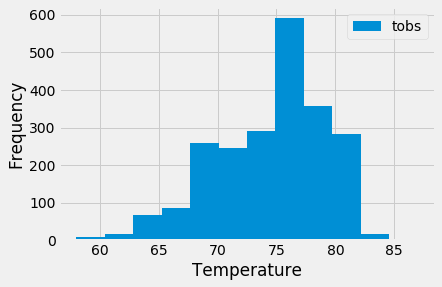

In [114]:
#plot the results as a histogram
temp_recent_year_df.plot(kind='hist', bins=12)
plt.xlabel("Temperature")